# Usage trends of Ford Go Bikes
## by Manish Kumar

## Investigation Overview

> We will investigate the trends aroud the usage of Ford Go Bike for e.g When are they used, what type of rides do people use them for, what are the trends around usage of bikes during different months of the year or days of a week etc.

## Dataset Overview

> The dataset contains the trip details for Ford GoBike taken in 2017. Each trip is anonymized and includes:
* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bikes_clean.csv')

## Distance vs Duration

> The visualization shows the distribution of rides based on their duration in secs and distace in kms. To better understand distribution we removed the outliers that had a distance of more than 20 kms.

> As the visualization shows most of the rides are of short duration (under 30000 sec) and shorter length (under 10 kms). Which give a clear indication of that usage pattern of bike i.e. users use it for shorter rides within city limits.

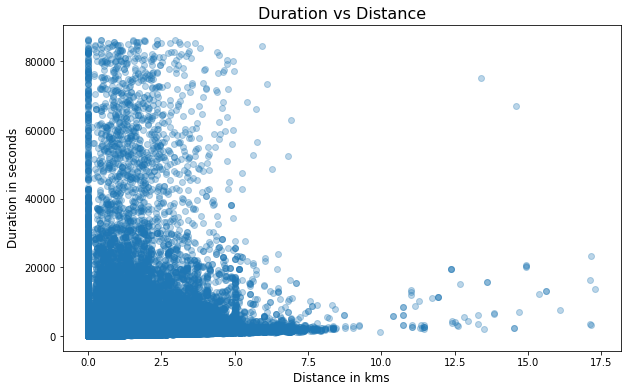

In [3]:
# due to the distance outliers the relation between distance and duration_sec is not as clear.
# Lets drop the outliers and create a plot 
df_dis_dur = df.query("distance < 20")
plt.figure(figsize=[10, 6])
plt.scatter(data = df_dis_dur, x = 'distance', y = 'duration_sec', alpha = 0.3)
plt.title('Duration vs Distance', fontsize=16)
plt.xlabel('Distance in kms',fontsize=12)
plt.ylabel('Duration in seconds',fontsize=12);

## Rides during the time of day (Morning/Noon/Evening)

> The below visualization shows that number of rides taken on different days of a week and different time of the day (Morning/Afternoon/Evening).
* Its clealry evident from the during the weekdays the maximum numbe of rides are taken during the moring hours i.e 06:00 AM to 11:59 AM and least during the afternoon i.e 12:00 PM - 15:59 PM. 
* On the other hand during the weekend i.e. Sunday and Saturday thats not the case, more rides are taken during the afternoon and lest during the Evening.
* So the Go bike are used more during the Mornings and Afternoons and least during the Evenings

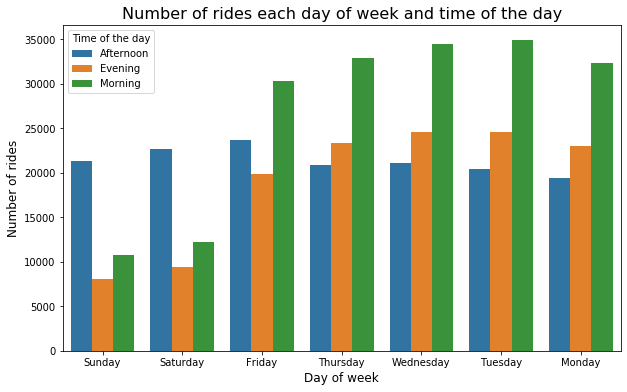

In [4]:
# plot a graph to see what time of the day rides are taken for each day of the week
plt.figure(figsize=[10, 6])
sb.countplot(data = df, x = 'day_of_week', hue = 'day_time')
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides each day of week and time of the day', fontsize=16)
plt.legend(title = 'Time of the day');

## Rides by different user types

> From our investigation its clearly evident that almost 79% of the rides are taken by the Subscribers and the rest 21% by Customers (one time users). The same trend is observed on different days of the week.


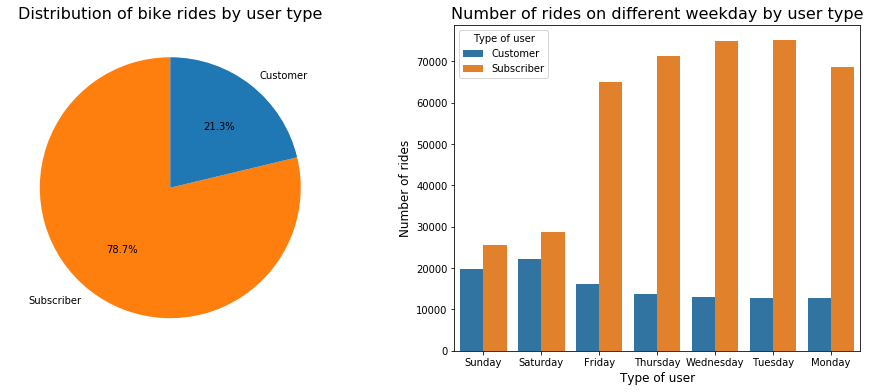

In [5]:
# plot a graph to see how different user types ride each day of week
current_palette = sb.color_palette()
plt.figure(figsize=[16, 6])
plt.subplot(1,2,1)
df.user_type.value_counts().plot.pie(autopct='%1.1f%%', startangle=90,colors = [current_palette[1],current_palette[0]])
plt.title('Distribution of bike rides by user type', fontsize=16)
plt.ylabel('')

plt.subplot(1,2,2)
sb.countplot(data = df, x = 'day_of_week', hue = 'user_type')
plt.xlabel('Type of user', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides on different weekday by user type', fontsize=16)
plt.legend(title = 'Type of user');